# import package

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from scipy.stats import gaussian_kde

# read data

In [11]:
data = pd.read_excel('yanzhengshuju.xlsx')

# ET

In [12]:
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 2023)

etr = ExtraTreesRegressor()
parameters= {
    'min_samples_leaf':list(range(1,10,1)),
    'n_estimators':list(range(10,20,2)),
    'max_depth':list(range(1,10,2))
}

grid = GridSearchCV(estimator=ExtraTreesRegressor(random_state=90) ,param_grid=parameters,n_jobs= -1,cv=10)
etr_model = grid.fit(x_train,y_train)
best_parameters = grid.best_params_
etr_model = grid.best_estimator_
print(best_parameters)


y_etr_pre_train = etr_model.predict(x_train)
y_etr_pred = etr_model.predict(x_test)


mae_train = mean_absolute_error(y_etr_pre_train,y_train)
mse_train = mean_squared_error(y_etr_pre_train,y_train)
R2_train = r2_score(y_train,y_etr_pre_train)
print('training R2 = {:.3f} '.format(R2_train))
print('training mae = {:.3f} '.format(mae_train))
print('training mse = {:.3f} '.format(mse_train))
print('training RMSE = {:.3f} '.format(np.sqrt(mse_train)))

print()

mae_test = mean_absolute_error(y_etr_pred,y_test)
mse_test = mean_squared_error(y_etr_pred,y_test)
R2_test = r2_score(y_test,y_etr_pred)
print('test R2 = {:.3f}'.format(R2_test))
print('test mae = {:.3f} '.format(mae_test))
print('test mse = {:.3f} '.format(mse_test))
print('test RMSE = {:.3f} '.format(np.sqrt(mse_test)))

{'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 10}
training R2 = 0.997 
training mae = 0.862 
training mse = 1.758 
training RMSE = 1.326 

test R2 = 0.890
test mae = 5.475 
test mse = 57.597 
test RMSE = 7.589 


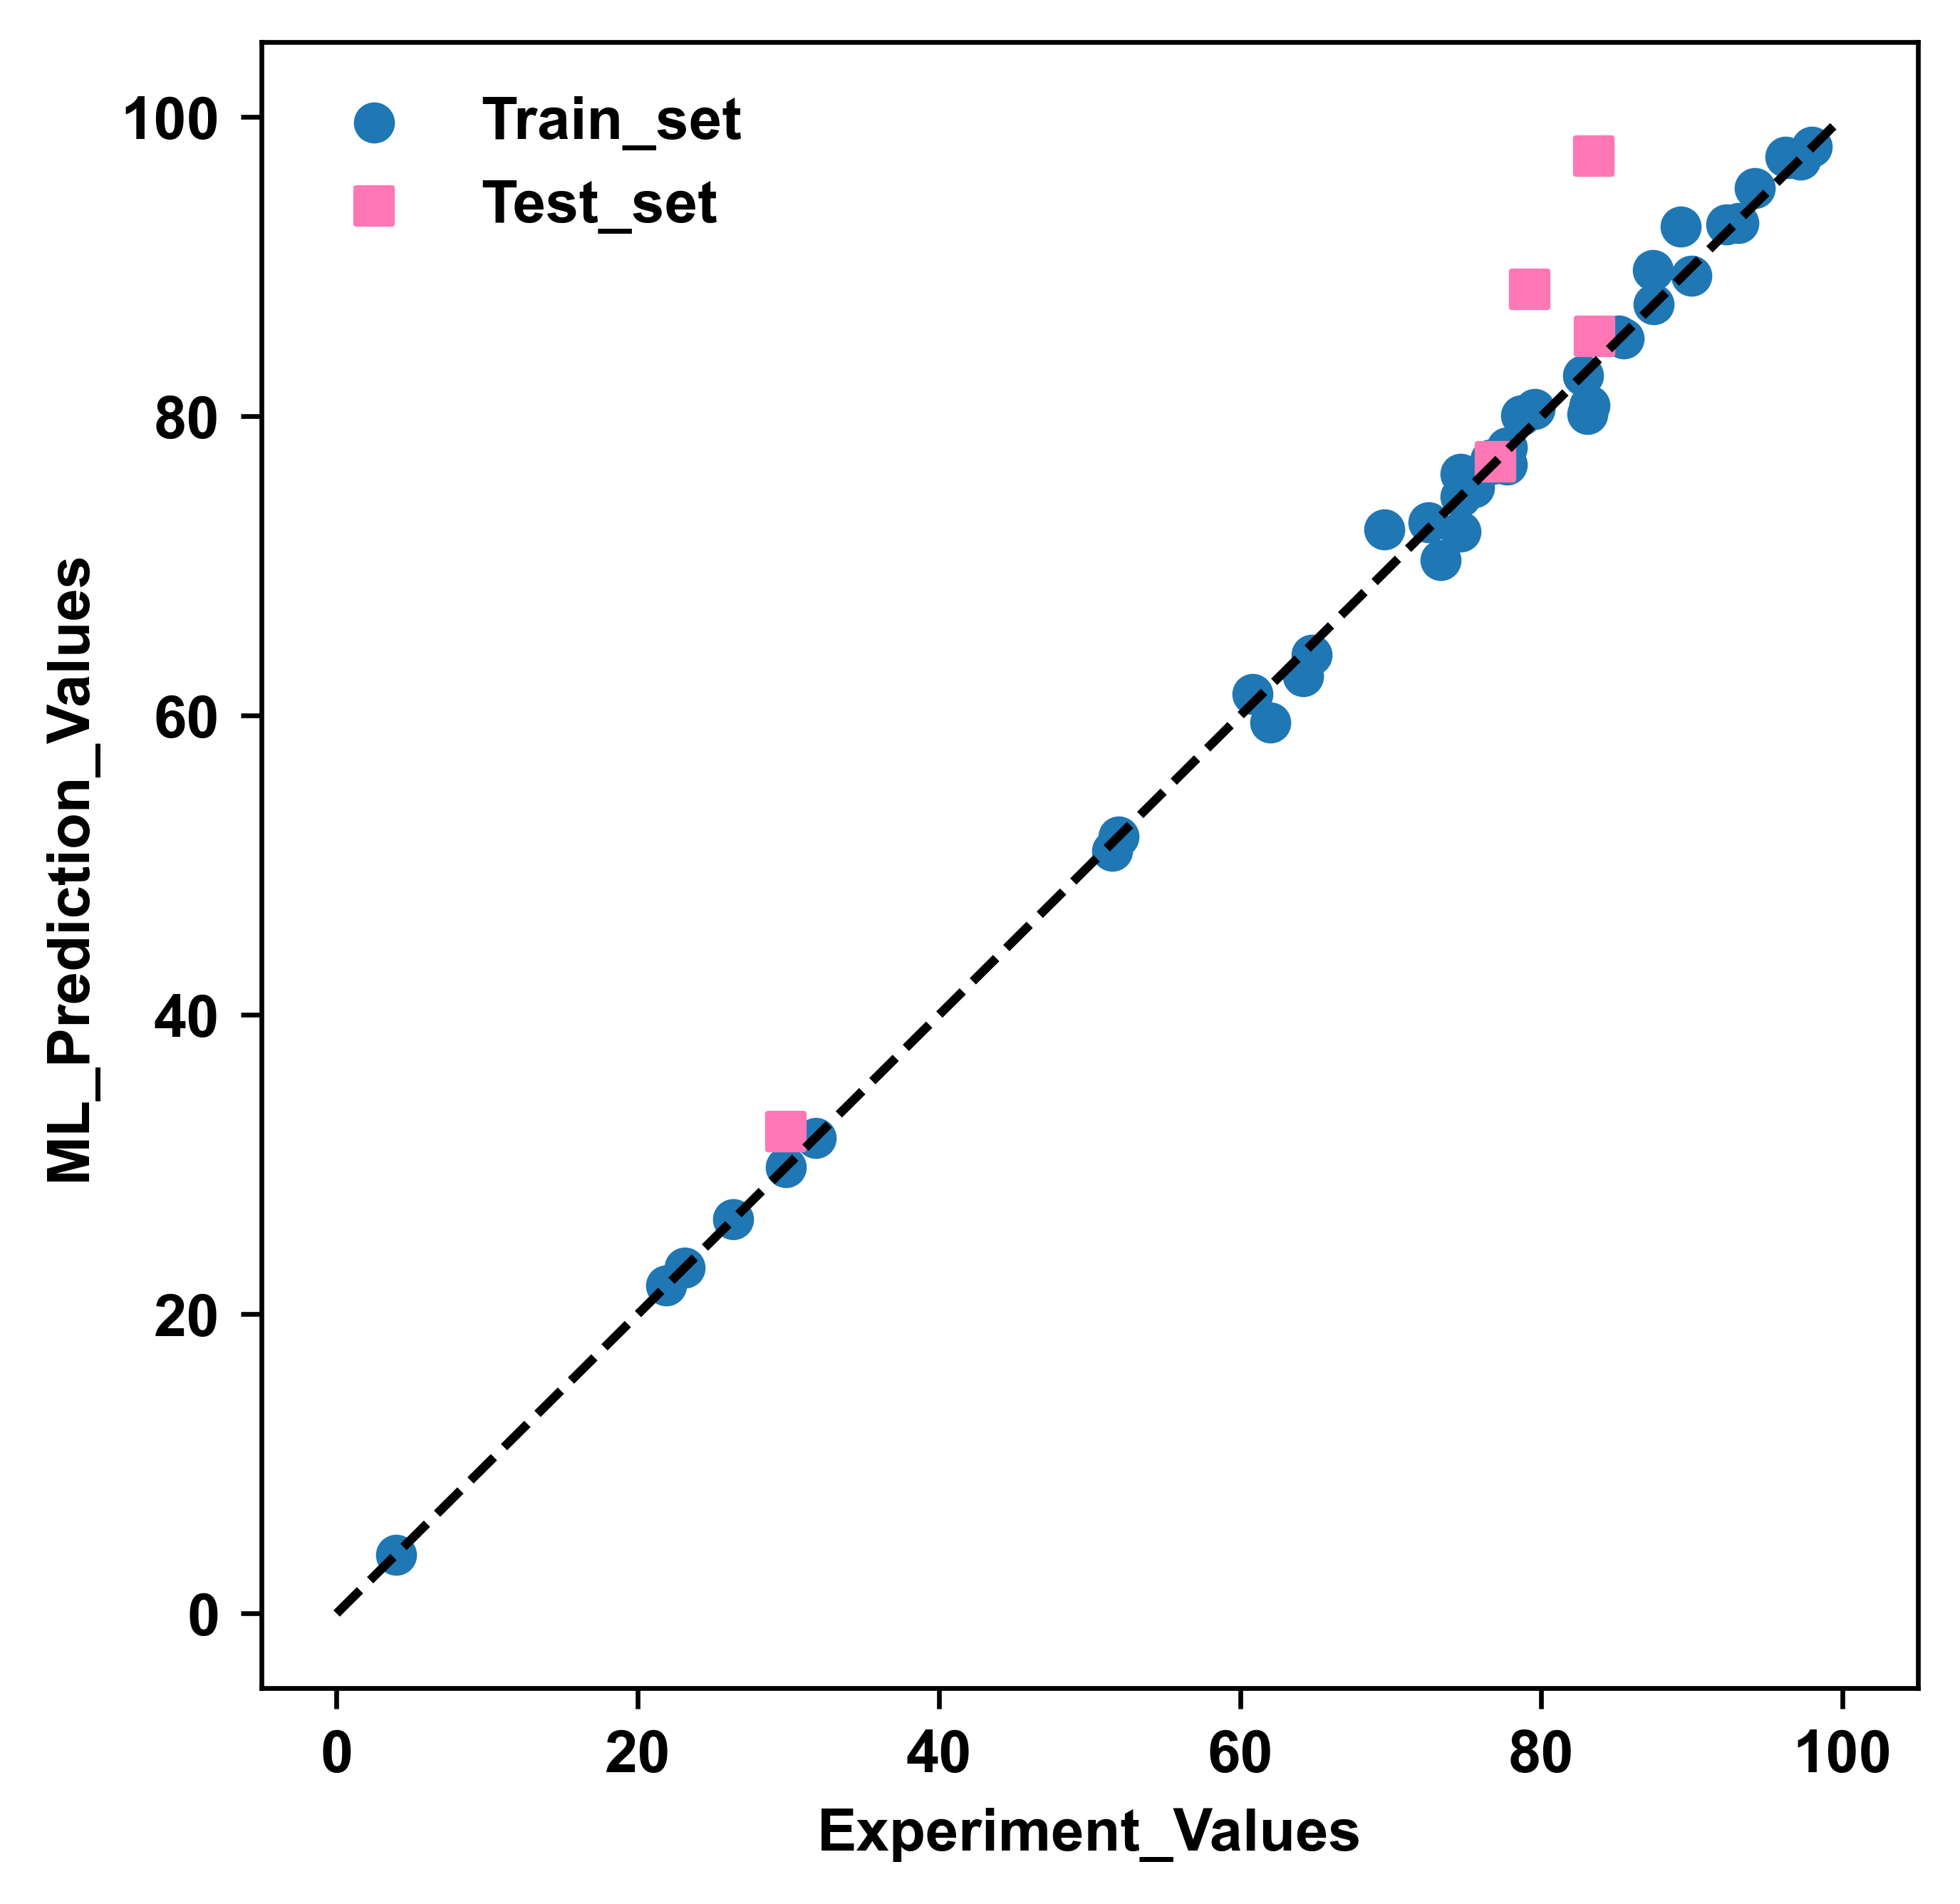

In [13]:
fig = plt.figure(figsize=(5,5),dpi=600)
plt.rc('font',family='Arial',weight= 'bold')

plt.scatter(y_etr_pre_train,y_train,alpha=1,marker='o',s=35,color='#1f77b4',label='Train_set')
plt.scatter(y_etr_pred,y_test,alpha=1,marker='s',s=35,color='#ff77b4',label='Test_set')
plt.plot([0,100],[0,100],c='black',ls='--')
plt.ylabel("ML_Prediction_Values",weight= 'bold')
plt.xlabel("Experiment_Values",weight= 'bold')
plt.legend(frameon=False)
plt.show()

# data combination

In [14]:

Alcohol = ['MeOH','EtOH']
alkali = ['NaOH','KOH']
ether = ['DX','DME','THF']
temperture = [30,32,35,37,40,42,45]
Alkali_concentration = [2,2.5,3,3.5,4,4.5,5]
Alcohol_ether_ratio = [1,1.5,3]

In [15]:
data = [
    ['MeOH','EtOH'], 
    ['NaOH', 'KOH'], 
    ['DX','DME','THF'], 
    temperture,
    Alkali_concentration, 
    Alcohol_ether_ratio]

result = [[]]

for list_pool in data:
    lis = []
    for i in result:
        for j in list_pool:
            lis.append(i + [j])
    result = lis
data = pd.DataFrame(result)
data_onehot = data.iloc[:,0:3]
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(drop=None)
feature_arr = onehot.fit_transform(data_onehot).toarray()
label = onehot.categories_
label = list(label[0]) + list(label[1]) + list(label[2])
feature_arr = pd.DataFrame(feature_arr,columns=label)
vg_df_one = pd.concat([data.iloc[:,3:6],feature_arr],axis=1)
vg_df_one

,3,4,5,EtOH,MeOH,KOH,NaOH,DME,DX,THF
0,30,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,30,2.0,1.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,30,2.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,30,2.5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,30,2.5,1.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1759,45,4.5,1.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1760,45,4.5,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1761,45,5.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1762,45,5.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# prediction

In [16]:
vg_df_one_predict=etr_model.predict(vg_df_one)
vg_df_one_predict= pd.DataFrame(vg_df_one_predict,columns=['Degradation'])
predice_data=pd.concat([vg_df_one, vg_df_one_predict], axis=1)
predice_data

,3,4,5,EtOH,MeOH,KOH,NaOH,DME,DX,THF,Degradation
0,30,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,71.777917
1,30,2.0,1.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,71.777917
2,30,2.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,71.777917
3,30,2.5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,84.316417
4,30,2.5,1.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,84.316417
...,...,...,...,...,...,...,...,...,...,...,...
1759,45,4.5,1.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,90.557500
1760,45,4.5,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,89.700000
1761,45,5.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,90.756500
1762,45,5.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,90.557500


# filter

## Output data with degradation rate greater than 90%

In [17]:
predice_data_90 = predice_data.loc[predice_data['Degradation']>90]
predice_data_90

,3,4,5,EtOH,MeOH,KOH,NaOH,DME,DX,THF,Degradation
6,30,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,90.947667
7,30,3.0,1.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,90.947667
8,30,3.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,91.427667
9,30,3.5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,93.024500
10,30,3.5,1.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,93.024500
...,...,...,...,...,...,...,...,...,...,...,...
1756,45,4.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,90.557500
1758,45,4.5,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,90.756500
1759,45,4.5,1.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,90.557500
1761,45,5.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,90.756500


## export to Excel

In [18]:
predice_data_90.to_csv('predice_data_90.csv')